In [2]:
import sys
sys.path.append('..')
from LSA import LSA
import pandas as pd

/Users/jessicaluo/Desktop/BTT-Clorox-Company/clorox_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Usage of LSA class

In [3]:
df = pd.read_csv('../../data/processed_reviews.csv')

In [4]:
lsa = LSA(df)

## run LSA on one subcategory

In [27]:
%%time
subcat = 'FACE CARE FACIAL MOISTURIZERS'
lsa_df = lsa.train_model_subcategory(subcat, verbose=2, calc_similarity=True)


Creating LSA models for FACE CARE FACIAL MOISTURIZERS
Creating LSA model for 1.0 star rating with 8154 reviews, 6 topics
Topic 0: Sensitive skin burns, breaks, or dries up from product
	['buy', 'sensitive', 'moisturizer', 'formula', 'cream', 'break', 'smell', 'burn', 'dry', 'make', 'like', 'face', 'use', 'product', 'skin']
Topic 1: Causes skin burns, dryness, and sensitivity
	['leave', 'make face', 'eye', 'burn skin', 'break', 'dry skin', 'make skin', 'red', 'make', 'sensitive skin', 'dry', 'sensitive', 'burn', 'face', 'skin']
Topic 2: Disappointing formula change; no option to revert back
	['formula change', 'ive', 'ive use', 'use', 'moisturizer', 'change formula', 'bring old', 'bring', 'year', 'change', 'new formula', 'old formula', 'old', 'new', 'formula']
Topic 3: Awful fragrance or sunscreen smelt bad on face
	['fragrance', 'doesnt', 'product smell', 'feel like', 'leave', 'awful', 'sunscreen', 'feel', 'strong', 'smell bad', 'face', 'bad', 'smell like', 'like', 'smell']
Topic 4: S

In [25]:
subcat_filter = lsa_df['subcategory'] == subcat
lsa_df[subcat_filter].sample(5)

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type,og_review_text,lsa_topic_number,lsa_topic_words,lsa_topic_label,lsa_similarity_score
576546,NYX Professional MakeUp,Nyx Professional Cream Cleansing Ao Scent 1 Ct...,2023-01-16,Walmart,PERSONAL CARE,FACE CARE FACIAL CLEANSERS,amaze product can use to replace foundation li...,5.0,Positive reviews for a makeup remover (undeter...,Competitor,Amazing product can use to replace foundation....,0.0,"sensitive, wash, leave, make, makeup, dry, gre...",Sensitive skin thoroughly cleaned and pampered...,0.275901
290794,Neutrogena,Neutrogena Alcohol-Free Gentle Daily Facial To...,2024-03-25,Amazon,PERSONAL CARE,FACE CARE FACIAL CLEANSERS,work as well or good than the high end toner,5.0,Comparison of toners and their effectiveness o...,Competitor,Works as well or better than the high end toners.,0.0,"sensitive, wash, leave, make, makeup, dry, gre...",Sensitive skin thoroughly cleaned and pampered...,0.147628
556139,Cerave,CeraVe Travel Size Foaming Face Cleanser for N...,2023-02-13,Walmart,PERSONAL CARE,FACE CARE FACIAL CLEANSERS,this face wash get deep into pore and be the p...,4.0,Review of a face wash product,Competitor,This face wash gets deep into pores and is the...,0.0,"love, make, great, leave, makeup, dry, good, c...",Great cleanser leaves skin feeling dry-free an...,0.522199
583818,Cocokind,Private Label Liquid Gel Ao Treatment Ao Scent...,2023-01-09,Walmart,PERSONAL CARE,FACE CARE FACIAL CLEANSERS,iâ€™ve go through 5 bottle of this easily i we...,5.0,Gentle and effective makeup remover options,Competitor,Iâ€™ve gone through 5 bottles of this easily. ...,0.0,"sensitive, wash, leave, make, makeup, dry, gre...",Sensitive skin thoroughly cleaned and pampered...,0.364295
636764,Neutrogena,Neutrogena Oil-Free Eye Makeup Remover - 3.8oz,2022-08-15,CVS,PERSONAL CARE,FACE CARE FACIAL CLEANSERS,i like be mix with oil and make so easy to rem...,5.0,Positive reviews for a makeup remover (undeter...,Competitor,I like is mix with oil and made so easy to rem...,0.0,"sensitive, wash, leave, make, makeup, dry, gre...",Sensitive skin thoroughly cleaned and pampered...,0.453988


In [26]:
# save to csv
lsa_df[subcat_filter].to_csv(f'../../data/lsa_{subcat.replace(" ", "_").lower()}.csv', index=False)

## run LSA on multiple subcategories

In [29]:
def subcategories_of_size(df, target_sizes, num_subcategories, allowance=1000):
    """
    target_sizes = list of integers, sizes to find subcategories for.
    num_subcategories: list of integers, parallel to target_sizes and indicates number of subcategories to return for each target_size.
    allowance: integer, how much to allow the size to vary from the target_size.
    Returns a list of subcategories that have sizes that are target_sizes +/- allowance.
    """
    subcat_sizes = df['subcategory'].value_counts().to_dict()
    subcategories = []
    for target_size in target_sizes:
        valid_subcategories = [name for name, size in subcat_sizes.items() if abs(size - target_size) < allowance]
        subcategories.extend(valid_subcategories[:num_subcategories[target_sizes.index(target_size)]])
    return subcategories

In [ ]:
# pick 1 subcat with around 20k, 10k
# pick multiple with 5k, 2k reviews
# target_sizes = [20000, 10000, 5000, 2000]
# num_subcategories = [1, 2, 5, 10]
# subcategories = subcategories_of_size(df, target_sizes, num_subcategories)

subcategories = ["WIPES DISINFECTING WIPES", "BODY CARE BODY LOTION", "AIR FRESHENER", "SPRAY CLEANERS BLEACH CLEANERS", "HAIR CARE"]

In [ ]:
lsa_df = lsa.train_model(subcategories, verbose=1)


Creating LSA models for WIPES DISINFECTING WIPES
Creating LSA model for 1.0 star rating with 933 reviews, 3 topics
Finished creating LSA model for 1.0 star rating in 0.86 seconds

--------------------------------------------------
Creating LSA model for 2.0 star rating with 321 reviews, 3 topics
Finished creating LSA model for 2.0 star rating in 0.81 seconds

--------------------------------------------------
Creating LSA model for 3.0 star rating with 591 reviews, 3 topics
Finished creating LSA model for 3.0 star rating in 0.69 seconds

--------------------------------------------------
Creating LSA model for 4.0 star rating with 1907 reviews, 2 topics
Finished creating LSA model for 4.0 star rating in 0.71 seconds

--------------------------------------------------
Creating LSA model for 5.0 star rating with 18843 reviews, 2 topics
Finished creating LSA model for 5.0 star rating in 1.61 seconds

--------------------------------------------------
Finished creating LSA models for WIPE

5 min 21 s to run on ["WIPES DISINFECTING WIPES", "BODY CARE BODY LOTION", "AIR FRESHENER", "SPRAY CLEANERS BLEACH CLEANERS", "HAIR CARE"]

approx sizes in thousands = [22, 20, 11, 5, 2]

lsa model build time in seconds [4.67, 4.77, 3.97, 2.94, 2.8]

similarity score computation time [112.5, 105.6, 50, 17.2, 7.2]

In [6]:
lsa_df.to_csv('../../data/lsa_wipes_lotion_airfreshener_spraycleaners_haircare.csv', index=False)

In [ ]:
selected_subcat_sizes = df[df['subcategory'].isin(subcategories)].groupby('subcategory').size()[subcategories]
selected_subcat_sizes

subcategory
WIPES DISINFECTING WIPES          22595
BODY CARE BODY LOTION             20281
AIR FRESHENER                     11161
SPRAY CLEANERS BLEACH CLEANERS     4731
HAIR CARE                          1578
dtype: int64

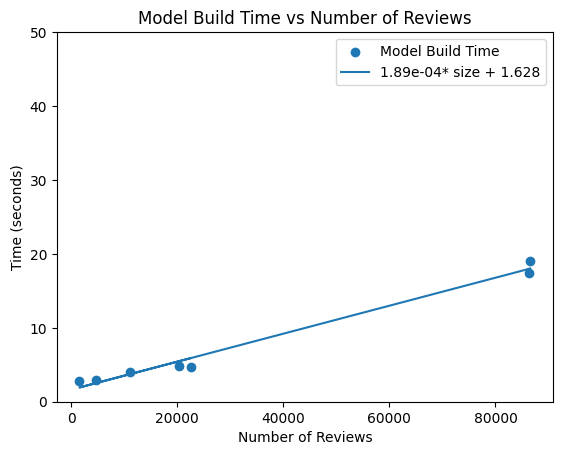

In [28]:
import numpy as np
model_build_time = [4.67, 4.77, 3.97, 2.94, 2.8, 19.02, 17.37]
sscore_time = [112.5, 105.6, 50, 17.2, 7.2, 488, 402.5]
# plot model and ssccore time vs subcat size
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sizes = list(selected_subcat_sizes.values)
sizes.append(86576)
sizes.append(86229)
ax.scatter(sizes, model_build_time, label='Model Build Time')
m, b = np.polyfit(sizes, model_build_time, 1)
ax.plot(sizes, m*np.array(sizes) + b, label=f'{m:.2e}* size + {round(b,3)}')
# ax.scatter(selected_subcat_sizes, sscore_time, label='Similarity Score Time')

# m, b = np.polyfit(selected_subcat_sizes, sscore_time, 1)
# ax.plot(selected_subcat_sizes, m*np.array(selected_subcat_sizes) + b, label=f'{m:.2e}*size + {round(b,3)}')
ax.legend()
plt.yticks(np.arange(0, 60, 10))
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Time (seconds)')
plt.title('Model Build Time vs Number of Reviews')
plt.show()

7 min 50 s to run selected subcategories from

target_sizes = [20000, 10000, 5000, 2000]

num_subcategories = [1, 2, 5, 10]

# consider similarity score btwn review and top words

In [ ]:
# calculate similarity score btwn reviews and top 15 words
subset = lsa_df[lsa_df['subcategory'].isin(subcategories)]
subset.to_csv('../data/varied_size_subcategories_lsa.csv', index=False)

In [52]:
from sentence_transformers import SentenceTransformer
from torch.nn.functional import cosine_similarity
import os 
import time
def similarity_scores(reviews, topics, model_name='all-MiniLM-L6-v2', chunk_size=1000):
    """
    Calculate the similarity scores between reviews and topics using a pre-trained SentenceTransformer model.
    Chunking is used to avoid memory issues when calculating similarity scores for a large number of reviews.
  
    model_name: the name of the pre-trained SentenceTransformer model to use
    reviews: a list of review texts
    topics: a list of topic phrases
    chunk_size: the number of reviews to process at a time
  
    return: a 2D numpy array of similarity scores
    """
    model = SentenceTransformer(model_name)
    num_reviews = len(reviews)
    similarity_scores = []
    total_time = 0
    for i in range(0, num_reviews, chunk_size):
        start = time.time()
        chunk_reviews = reviews[i:i + chunk_size]
        review_embeddings = model.encode(chunk_reviews, convert_to_tensor=True)
        chunk_topics = topics[i:i + chunk_size]
        phrase_embeddings = model.encode(chunk_topics, convert_to_tensor=True)
        chunk_similarity = cosine_similarity(review_embeddings, phrase_embeddings).cpu().numpy()
        similarity_scores.extend(chunk_similarity)
        time_i = time.time() - start
        print(f"Time to process chunk {i}-{i + chunk_size}: {time_i:.2f} seconds")
        total_time += time_i
    print(f"Total processing time: {total_time:.2f} seconds")
    return similarity_scores

In [53]:
word_similarity_scores = similarity_scores(list(subset['review_text']), list(subset['lsa_top_15_words']))

/Users/jessicaluo/Desktop/scrap/text_processes/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Time to process chunk 0-1000: 5.64 seconds
Time to process chunk 1000-2000: 6.69 seconds
Time to process chunk 2000-3000: 4.65 seconds
Time to process chunk 3000-4000: 4.78 seconds
Time to process chunk 4000-5000: 4.47 seconds
Time to process chunk 5000-6000: 4.30 seconds
Time to process chunk 6000-7000: 4.92 seconds
Time to process chunk 7000-8000: 7.47 seconds
Time to process chunk 8000-9000: 4.48 seconds
Time to process chunk 9000-10000: 4.49 seconds
Time to process chunk 10000-11000: 4.92 seconds
Time to process chunk 11000-12000: 5.54 seconds
Time to process chunk 12000-13000: 5.93 seconds
Time to process chunk 13000-14000: 5.43 seconds
Time to process chunk 14000-15000: 4.83 seconds
Time to process chunk 15000-16000: 5.56 seconds
Time to process chunk 16000-17000: 6.84 seconds
Time to process chunk 17000-18000: 5.51 seconds
Time to process chunk 18000-19000: 4.57 seconds
Time to process chunk 19000-20000: 5.13 seconds
Time to process chunk 20000-21000: 6.43 seconds
Time to proces

In [ ]:
lsa_df.loc[subset.index, 'top_words_similarity_score'] = word_similarity_scores

In [57]:
lsa_df.loc[subset.index, 'topic_phrase_SS - topic_words_SS'] = lsa_df['lsa_similarity_score'] - lsa_df['top_words_similarity_score']

In [ ]:
# print size of each subcategory in subcategories
lsa_df[lsa_df['subcategory'].isin(subcategories)]['subcategory'].value_counts()

subcategory
ODOR CONTROLLING DISINFECTING SPRAYS              20806
DILUTABLES SCENTED/NON-DISINFECTING DILUTABLES    10754
ODOR CONTROLLING AIR FRESHENERS                    9877
BODY CARE BAR SOAP                                 5595
FLOOR CLEANERS CARPET                              5352
SPRAY CLEANERS BLEACH CLEANERS                     4731
TOILET BOWL CLEANERS CONVENIENCE TB CLEANERS       4578
ABRASIVE CLEANERS                                  4427
DILUTABLES PINE/DISINFECTING DILUTABLES            2794
BATHROOM CLEANERS MILDEW CLEANERS                  2633
DISH CARE                                          2514
CONSUMABLE TOOLS SPONGES                           2465
SPECIALIZED SPRAYS                                 2117
LIP CARE PREMIUM LIP CARE                          2084
DILUTABLES NATURAL/CONCENTRATED                    2042
SPECIALIZED SPRAYS OVEN/SPECIALTY                  1819
MEN'S CARE                                         1817
HAIR CARE                           

# og bertopic similarity scores

In [86]:
bertopic_similarity = similarity_scores(list(subset['review_text']), list(subset['topic']))

/Users/jessicaluo/Desktop/scrap/text_processes/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Time to process chunk 0-1000: 7.01 seconds
Time to process chunk 1000-2000: 3.35 seconds
Time to process chunk 2000-3000: 3.68 seconds
Time to process chunk 3000-4000: 3.18 seconds
Time to process chunk 4000-5000: 3.63 seconds
Time to process chunk 5000-6000: 3.16 seconds
Time to process chunk 6000-7000: 3.28 seconds
Time to process chunk 7000-8000: 3.29 seconds
Time to process chunk 8000-9000: 3.41 seconds
Time to process chunk 9000-10000: 3.94 seconds
Time to process chunk 10000-11000: 3.34 seconds
Time to process chunk 11000-12000: 3.43 seconds
Time to process chunk 12000-13000: 3.42 seconds
Time to process chunk 13000-14000: 3.27 seconds
Time to process chunk 14000-15000: 3.32 seconds
Time to process chunk 15000-16000: 3.49 seconds
Time to process chunk 16000-17000: 3.54 seconds
Time to process chunk 17000-18000: 3.53 seconds
Time to process chunk 18000-19000: 3.17 seconds
Time to process chunk 19000-20000: 3.42 seconds
Time to process chunk 20000-21000: 3.35 seconds
Time to proces

In [96]:
lsa_df.loc[subset.index, 'og_bertopic_similarity_score'] = bertopic_similarity
lsa_df

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type,lsa_topic_number,lsa_top_15_words,lsa_topic_label,lsa_similarity_score,top_words_similarity_score,topic_phrase_SS - topic_words_SS,bertopic_similarity,og_bertopic_similarity_score
0,Clorox,Clorox Wring Clean Cotton Mop,2024-07-08,Target,CLEANING,FLOOR CLEANERS,the mop be cheap the wringing attachment doesnt wring well and leave a lot of water on the mop and worse the mop head break off after the first use i be leave to finish the job on my hand and kneesdont buy,1.0,Product review: Click n Clean multi-surface spray mop,Clorox,0.0,"water, bad mop, time, clean, like, bad, floor, buy, work, waste money, money, product, waste, use, mop","""Waste money on a bad mop that doesn't work""",0.556891,0.468383,NaN,NaN,NaN
1,Rapid,"32 oz. Rapid Clean Remediation, Trigger Spray Bottle",2024-07-08,Home Depot,CLEANING,BATHROOM CLEANERS MILDEW CLEANERS,this product be recommend for a front load wash machine the seal have mold build up follow exact direction and zero result on the mold home depot offer full refund,1.0,Mold removal and prevention products,Competitor,0.0,"spray, doesnt work, stain, waste money, bleach, waste, remove, doesnt, money, use, mildew, didnt, mold, product, work","""Waste money on ineffective stain remover""",0.201604,0.296843,-0.095240,0.345617,0.345617
2,Mrs. Meyer's Clean Day,Mrs Meyers Clean Day Cleaner Plastic Bottle Multi Surface Rp 16 Oz,2024-07-08,Target,CLEANING,SPRAY CLEANERS ALL PURPOSE CLEANERS,smell so good definitely my favorite scent,5.0,Fall scents and their popularity,Competitor,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN
3,Pourri,Poo Pourri Plastic Spray Bottle Toilet Oil Fresh Air 2 Oz,2024-07-08,Target,CLEANING,ODOR CONTROLLING AIR FRESHENERS,i keep multiple bottle in the bathroom and carry the travel size in my purse i hope they never stop make this,5.0,Household cleaning and sanitization tips,Competitor,0.0,"air, smell good, receive, fresh, work, use, love smell, spray, good, like, product, great, love, scent, smell","""Fresh, pleasant scent for daily use, loved by many.""",0.257794,0.089331,0.168463,0.243561,0.243561
4,Twist & Shout,Twist & Shout Spin Mop & Bucket System with 1 Refill,2024-07-01,Costco,CLEANING,FLOOR CLEANERS,i recently just get this mop love how easy it be to use,5.0,Product review: Click n Clean multi-surface spray mop,Competitor,0.0,"mop, cleaner, easy, love, stain, smell, work great, carpet, good, floor, clean, product, use, work, great","""Easy-to-use, great working carpet cleaner with no stain or smell issues""",0.395226,0.485544,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640601,Neutrogena,Neutrogena Liquid Gel Cleansing Fragrance Free/Unscented 1 Ct 16 Oz,2022-07-04,Kroger,PERSONAL CARE,FACE CARE FACIAL CLEANSERS,i dont know what in this could possibly do this but it make my skin feel so tight and sting i use it for many month think it couldnt possibly be from this face wash my skin be more red than usual and i have so many pimple all over small and large one i switch to another face wash and immediately my skin felt releif usually neutrogena work for me so im really disappointed if your skin seem angry with this try something else,1.0,Positive reviews for a makeup remover (undetermined topic),Competitor,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN
640602,Hero Cosmetics,Hero Lightning Wand Acne Treatment Serum Rp 1 Ct .34 Oz,2022-07-04,Kroger,PERSONAL CARE,FACE CARE ACNE TREATMENTS,ive use this product for about 1month and it have make my dark spots disappear i would 1010 recommend,5.0,Dark spot fading progress with skin products,Competitor,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN
640603,Cetaphil,CETAPHIL LIQUID GEL CLEANSING AO SCENT 1 CT 16 OZ - 0302990110221,2022-07-04,Kroger,PERSONAL CARE,FACE CARE FACIAL CLEANSERS,love this cleanser for myself and my daughter it be so gentle and clean so well perfect body wash for the shower doesnt dry you out but leave you 

In [ ]:
lsa_df.iloc[subset.index].to_csv('../data/18_subcategories_lsa.csv', index=False)

# LSA difference in similarity scores using topic phrase vs top words

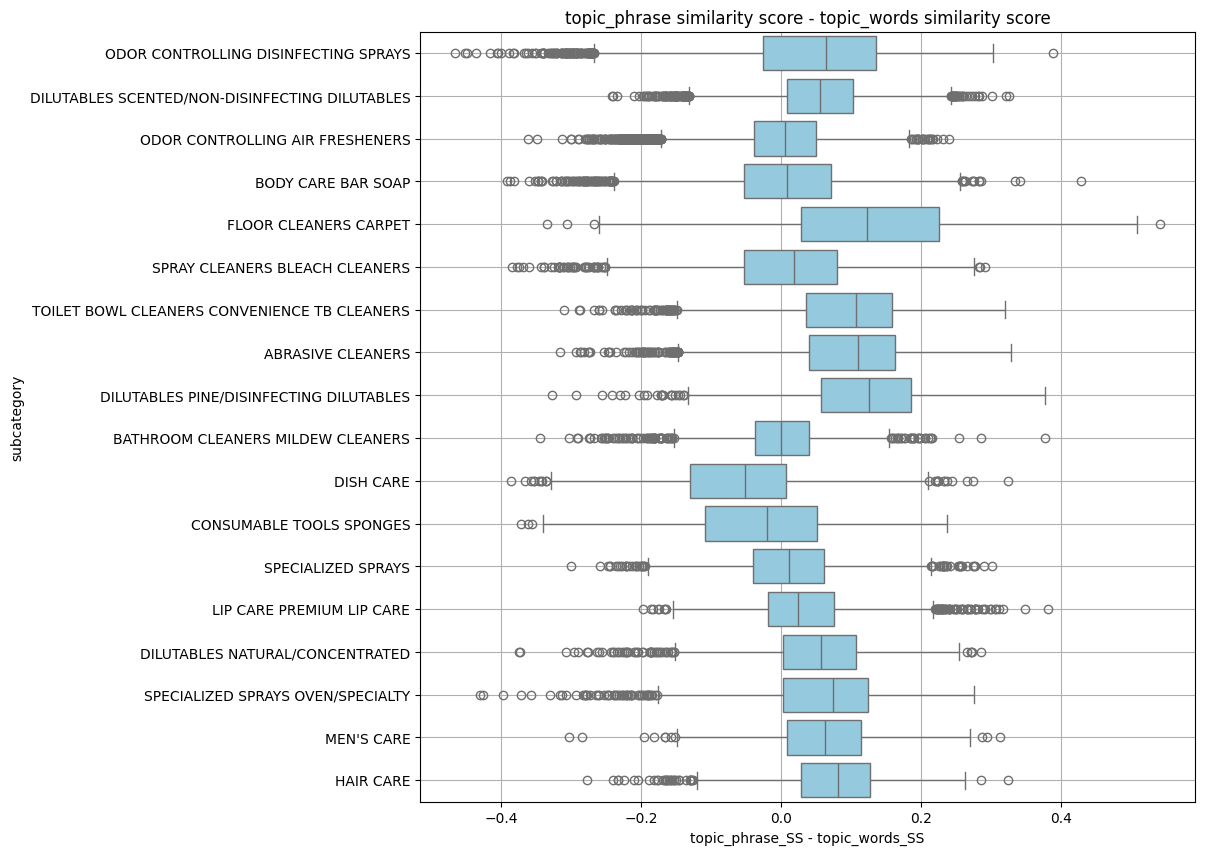

In [ ]:
# plot boxplot of similarity score differences for each subcategory
import matplotlib.pyplot as plt
import seaborn as sns

subset = lsa_df[lsa_df['subcategory'].isin(subcategories)]

# Calculate the size of each subcategory
subcategory_sizes = subset['subcategory'].value_counts()

# Sort the subcategories by size
sorted_subcategories = subcategory_sizes.index

# Create a sorted subset
sorted_subset = subset.set_index('subcategory').loc[sorted_subcategories].reset_index()

plt.figure(figsize=(10, 10))

# Plot the boxplots in the sorted order
sns.boxplot(y='subcategory', x='topic_phrase_SS - topic_words_SS', data=sorted_subset, vert=False, color='skyblue')
plt.title('topic_phrase similarity score - topic_words similarity score')
# show grid
plt.grid()
plt.show()

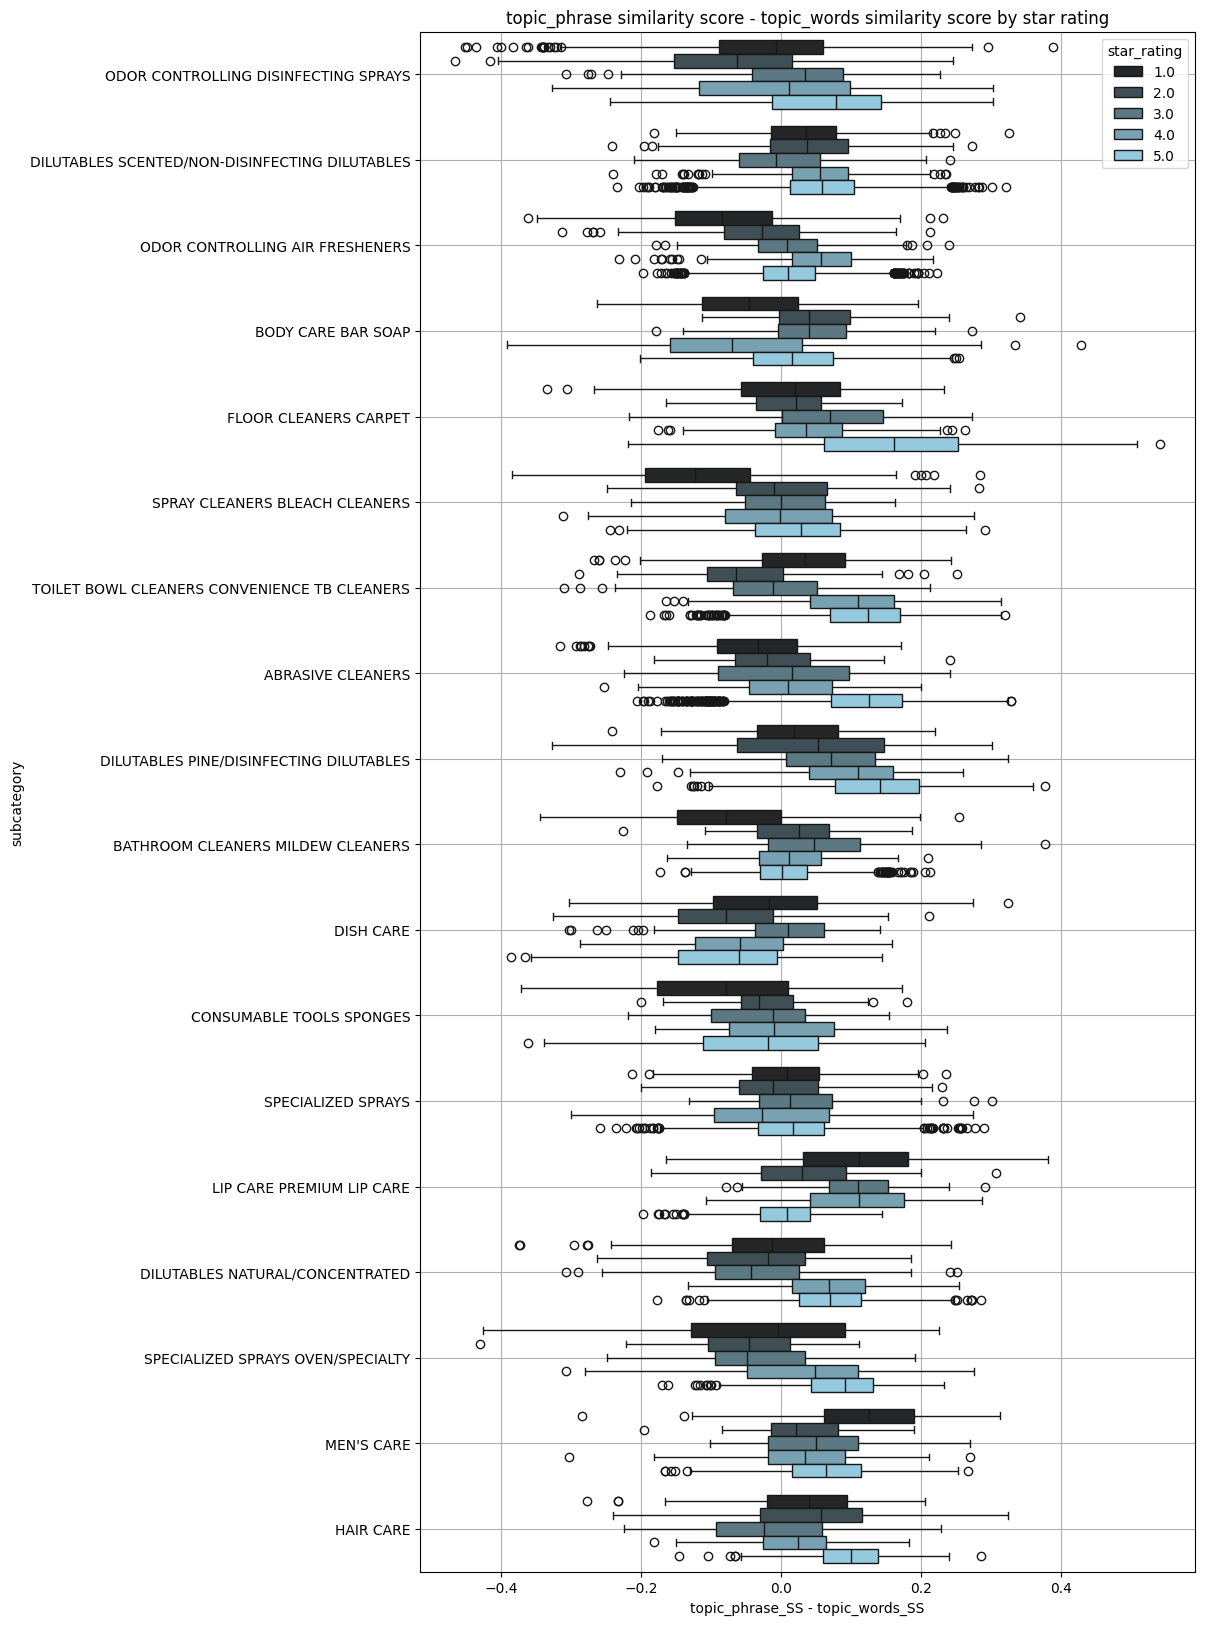

In [77]:
# boxplot of similarity score differences for each subcategory by star rating
plt.figure(figsize=(10, 20))

# Plot the boxplots in the sorted order
sns.boxplot(y='subcategory', x='topic_phrase_SS - topic_words_SS', hue='star_rating', data=sorted_subset, vert=False, palette='dark:skyblue')
plt.title('topic_phrase similarity score - topic_words similarity score by star rating')
# show grid
plt.grid()

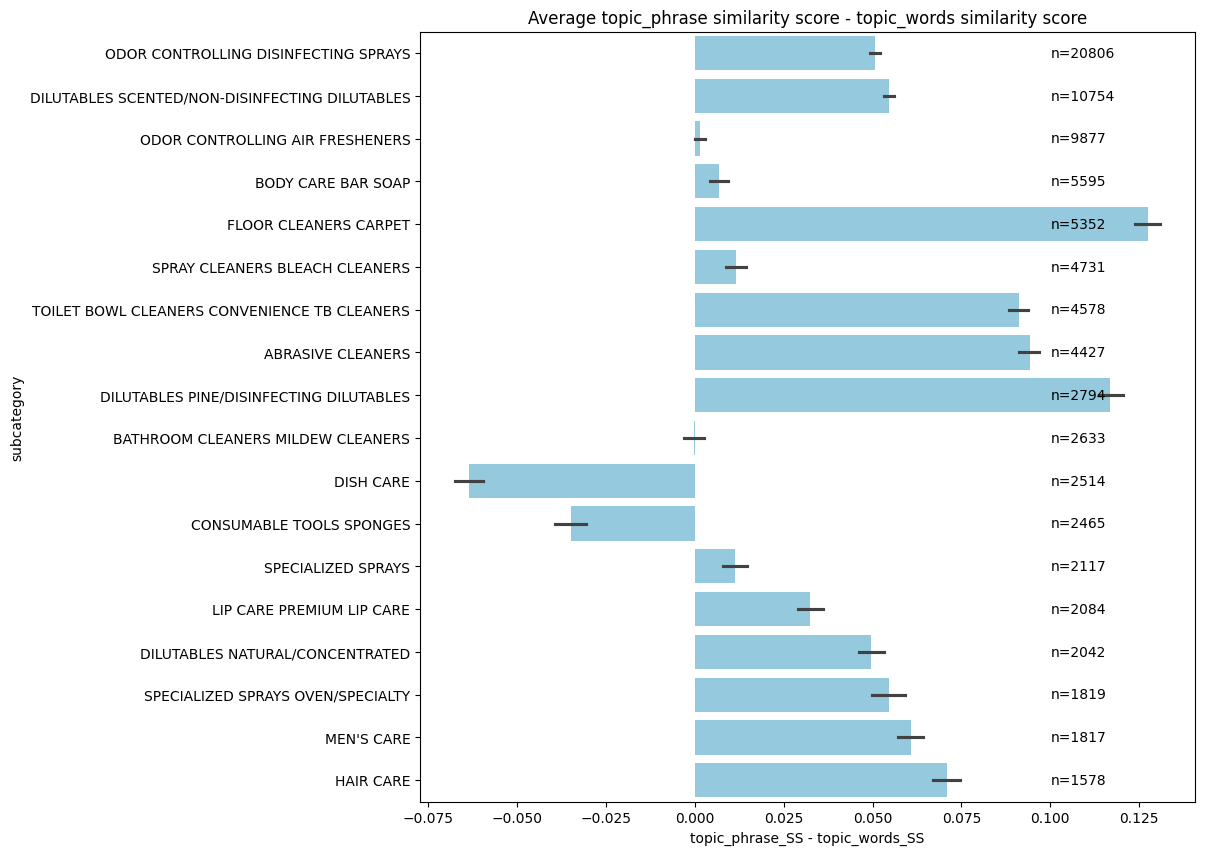

In [78]:
# plot histogram of average similarity score differences for each subcategory
plt.figure(figsize=(10, 10))

# Calculate the average similarity score difference for each subcategory
average_difference = sorted_subset.groupby('subcategory')['topic_phrase_SS - topic_words_SS'].mean()

# Create a sorted subset
sorted_subset = subset.set_index('subcategory').loc[sorted_subcategories].reset_index()

# Plot the histogram in the sorted order
sns.barplot(y='subcategory', x='topic_phrase_SS - topic_words_SS', data=sorted_subset, color='skyblue')

plt.title('Average topic_phrase similarity score - topic_words similarity score')

# label each subcategory with its size
for i, subcat in enumerate(sorted_subcategories):
    plt.text(0.1, i, f"n={subcategory_sizes[subcat]}", verticalalignment='center')


Text(0.5, 1.0, 'Average topic_phrase similarity score - topic_words similarity score by star rating')

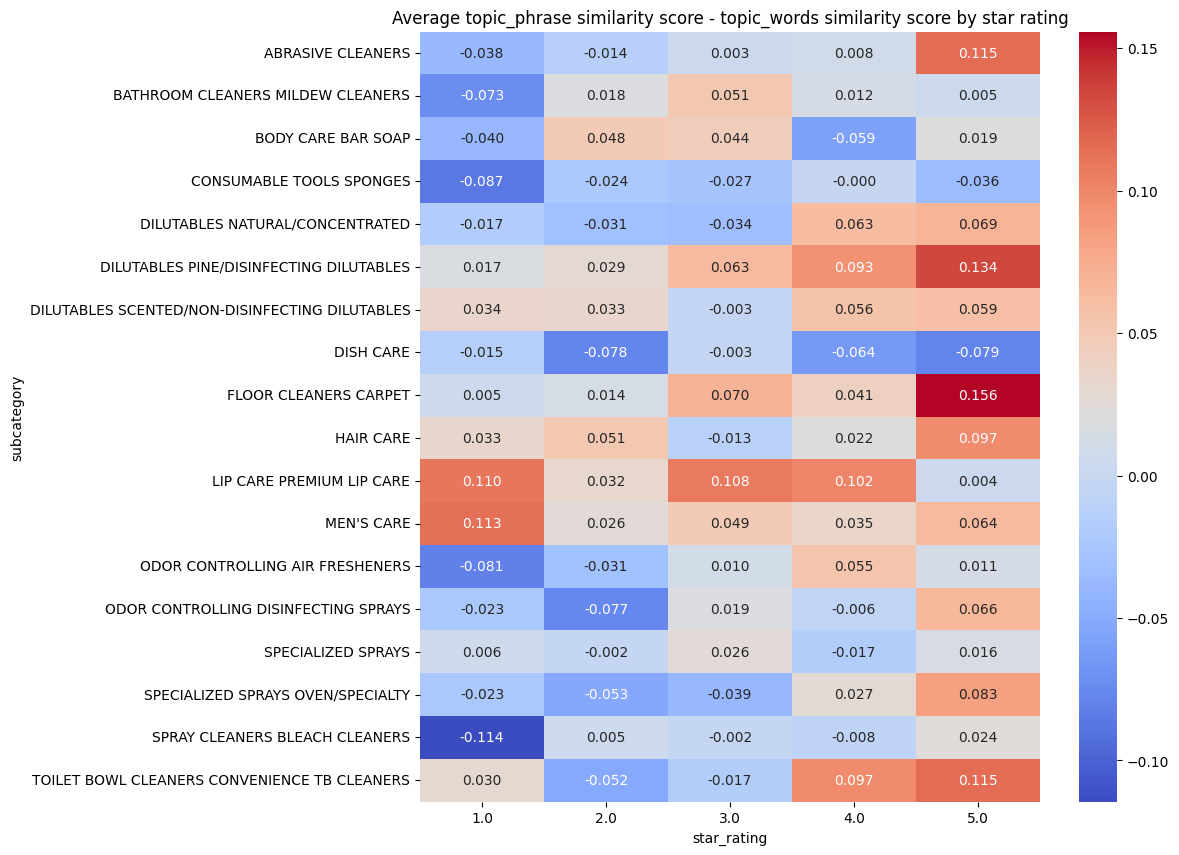

In [84]:
# plot heatmap of average similarity score differences for each subcategory by star rating

plt.figure(figsize=(10, 10))

# Calculate the average similarity score difference for each subcategory by star rating
average_difference = sorted_subset.groupby(['subcategory', 'star_rating'])['topic_phrase_SS - topic_words_SS'].mean().unstack()

# Plot the heatmap
sns.heatmap(average_difference, cmap='coolwarm', annot=True, fmt='.3f')
plt.title('Average topic_phrase similarity score - topic_words similarity score by star rating')

# og bertopic vs lsa similarity score using topic phrase

In [97]:
lsa_df.rename(columns={'topic': 'og_bertopic_topic'}, inplace=True)
lsa_df.head()

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,og_bertopic_topic,brand_type,lsa_topic_number,lsa_top_15_words,lsa_topic_label,lsa_similarity_score,top_words_similarity_score,topic_phrase_SS - topic_words_SS,bertopic_similarity,og_bertopic_similarity_score
0,Clorox,Clorox Wring Clean Cotton Mop,2024-07-08,Target,CLEANING,FLOOR CLEANERS,the mop be cheap the wringing attachment doesnt wring well and leave a lot of water on the mop and worse the mop head break off after the first use i be leave to finish the job on my hand and kneesdont buy,1.0,Product review: Click n Clean multi-surface spray mop,Clorox,0.0,"water, bad mop, time, clean, like, bad, floor, buy, work, waste money, money, product, waste, use, mop","""Waste money on a bad mop that doesn't work""",0.556891,0.468383,NaN,NaN,NaN
1,Rapid,"32 oz. Rapid Clean Remediation, Trigger Spray Bottle",2024-07-08,Home Depot,CLEANING,BATHROOM CLEANERS MILDEW CLEANERS,this product be recommend for a front load wash machine the seal have mold build up follow exact direction and zero result on the mold home depot offer full refund,1.0,Mold removal and prevention products,Competitor,0.0,"spray, doesnt work, stain, waste money, bleach, waste, remove, doesnt, money, use, mildew, didnt, mold, product, work","""Waste money on ineffective stain remover""",0.201604,0.296843,-0.095240,0.345617,0.345617
2,Mrs. Meyer's Clean Day,Mrs Meyers Clean Day Cleaner Plastic Bottle Multi Surface Rp 16 Oz,2024-07-08,Target,CLEANING,SPRAY CLEANERS ALL PURPOSE CLEANERS,smell so good definitely my favorite scent,5.0,Fall scents and their popularity,Competitor,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN
3,Pourri,Poo Pourri Plastic Spray Bottle Toilet Oil Fresh Air 2 Oz,2024-07-08,Target,CLEANING,ODOR CONTROLLING AIR FRESHENERS,i keep multiple bottle in the bathroom and carry the travel size in my purse i hope they never stop make this,5.0,Household cleaning and sanitization tips,Competitor,0.0,"air, smell good, receive, fresh, work, use, love smell, spray, good, like, product, great, love, scent, smell","""Fresh, pleasant scent for daily use, loved by many.""",0.257794,0.089331,0.168463,0.243561,0.243561
4,Twist & Shout,Twist & Shout Spin Mop & Bucket System with 1 Refill,2024-07-01,Costco,CLEANING,FLOOR CLEANERS,i recently just get this mop love how easy it be to use,5.0,Product review: Click n Clean multi-surface spray mop,Competitor,0.0,"mop, cleaner, easy, love, stain, smell, work great, carpet, good, floor, clean, product, use, work, great","""Easy-to-use, great working carpet cleaner with no stain or smell issues""",0.395226,0.485544,NaN,NaN,NaN


Subcategory: ODOR CONTROLLING DISINFECTING SPRAYS
LSA: star_rating
1.0    0.265527
2.0    0.268694
3.0    0.456760
4.0    0.441150
5.0    0.520052
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.455029
2.0    0.490569
3.0    0.512966
4.0    0.559919
5.0    0.561880
Name: og_bertopic_similarity_score, dtype: float64



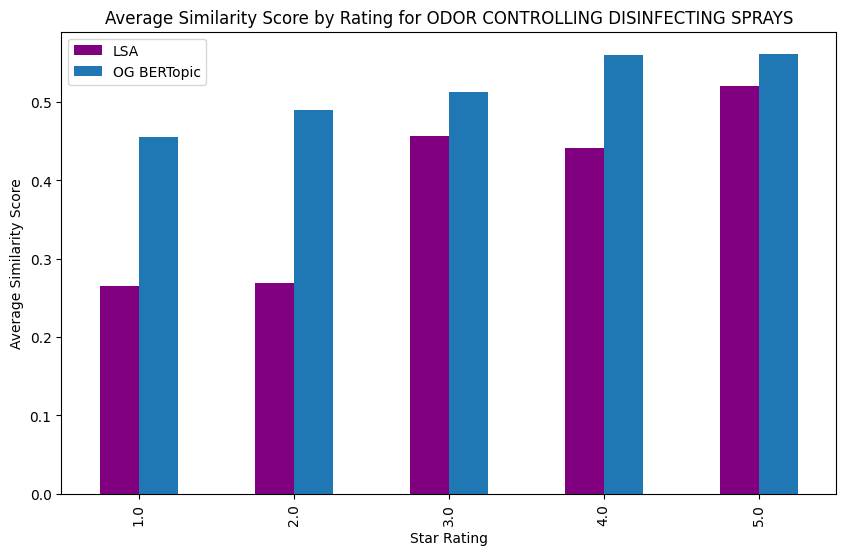

Subcategory: DILUTABLES SCENTED/NON-DISINFECTING DILUTABLES
LSA: star_rating
1.0    0.267847
2.0    0.263488
3.0    0.302030
4.0    0.402538
5.0    0.374098
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.418882
2.0    0.446169
3.0    0.435225
4.0    0.491609
5.0    0.493407
Name: og_bertopic_similarity_score, dtype: float64



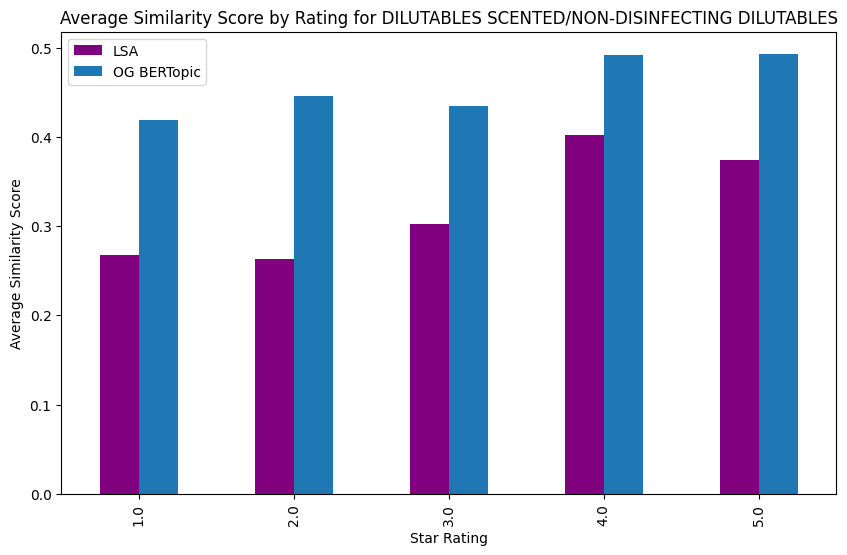

Subcategory: ODOR CONTROLLING AIR FRESHENERS
LSA: star_rating
1.0    0.253099
2.0    0.316029
3.0    0.377557
4.0    0.380968
5.0    0.357485
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.418508
2.0    0.418944
3.0    0.430089
4.0    0.454452
5.0    0.485981
Name: og_bertopic_similarity_score, dtype: float64



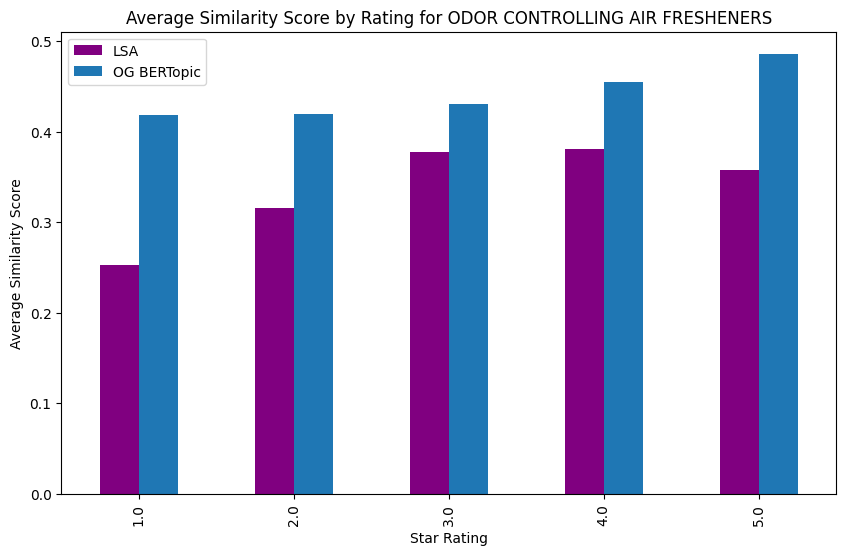

Subcategory: BODY CARE BAR SOAP
LSA: star_rating
1.0    0.290732
2.0    0.388658
3.0    0.450717
4.0    0.416250
5.0    0.396079
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.477474
2.0    0.562601
3.0    0.595805
4.0    0.617452
5.0    0.612713
Name: og_bertopic_similarity_score, dtype: float64



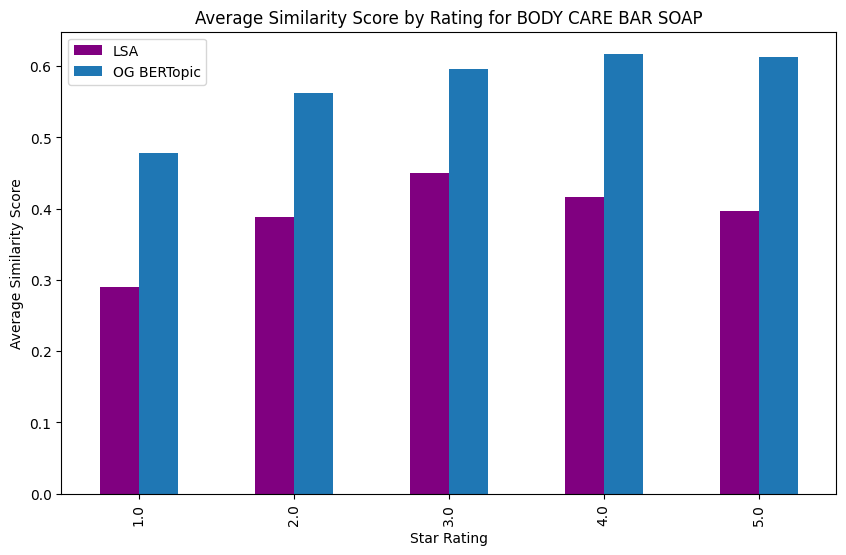

Subcategory: FLOOR CLEANERS CARPET
LSA: star_rating
1.0    0.331465
2.0    0.335054
3.0    0.362242
4.0    0.420920
5.0    0.497767
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.456940
2.0    0.478585
3.0    0.481250
4.0    0.505508
5.0    0.517646
Name: og_bertopic_similarity_score, dtype: float64



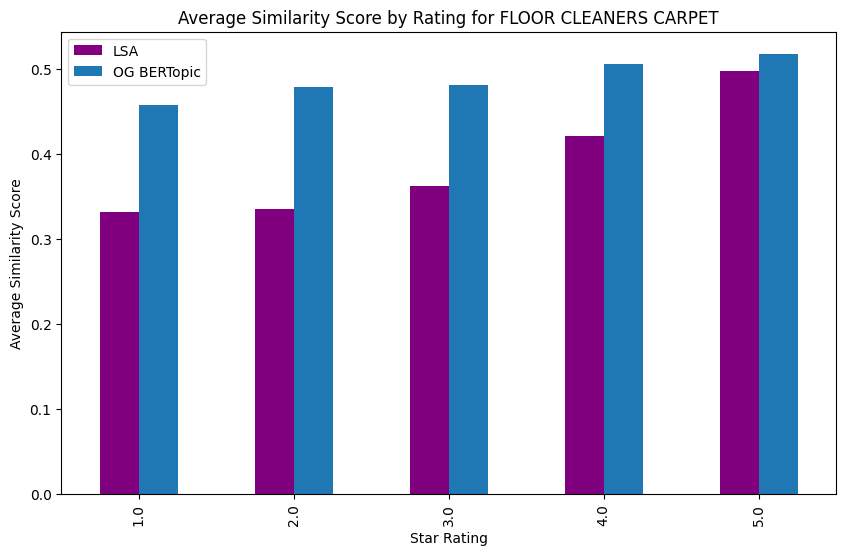

Subcategory: SPRAY CLEANERS BLEACH CLEANERS
LSA: star_rating
1.0    0.223878
2.0    0.352059
3.0    0.350042
4.0    0.402518
5.0    0.448889
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.440133
2.0    0.469009
3.0    0.492727
4.0    0.527155
5.0    0.563099
Name: og_bertopic_similarity_score, dtype: float64



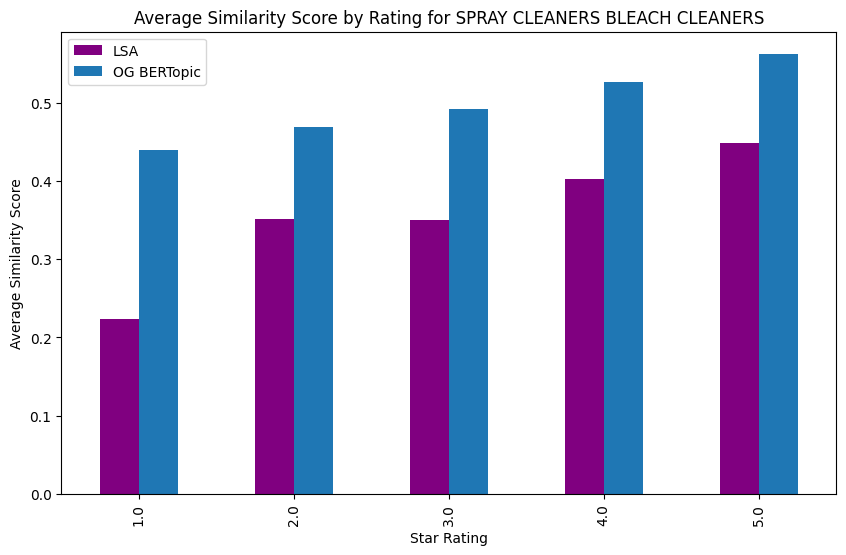

Subcategory: TOILET BOWL CLEANERS CONVENIENCE TB CLEANERS
LSA: star_rating
1.0    0.364775
2.0    0.288514
3.0    0.270798
4.0    0.406158
5.0    0.462082
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.443784
2.0    0.439188
3.0    0.478213
4.0    0.471830
5.0    0.515280
Name: og_bertopic_similarity_score, dtype: float64



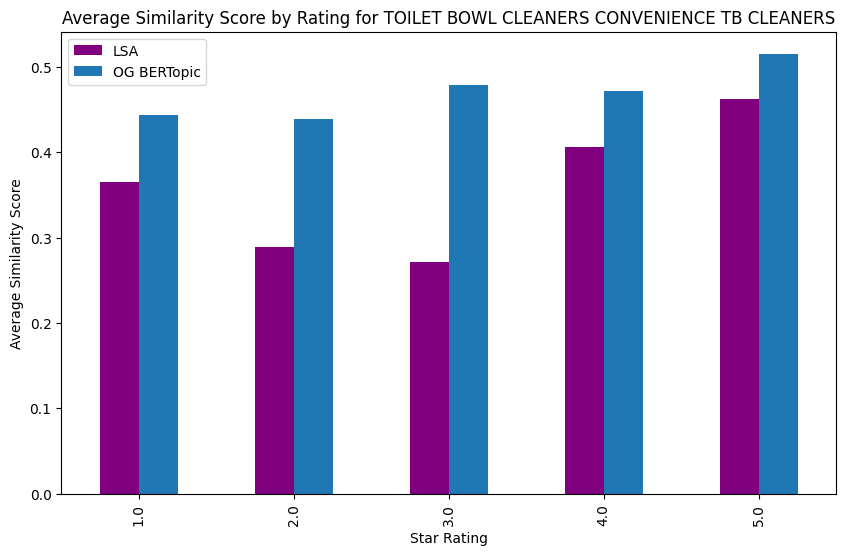

Subcategory: ABRASIVE CLEANERS
LSA: star_rating
1.0    0.171399
2.0    0.169434
3.0    0.264714
4.0    0.325269
5.0    0.350226
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.360266
2.0    0.378748
3.0    0.375620
4.0    0.423542
5.0    0.450166
Name: og_bertopic_similarity_score, dtype: float64



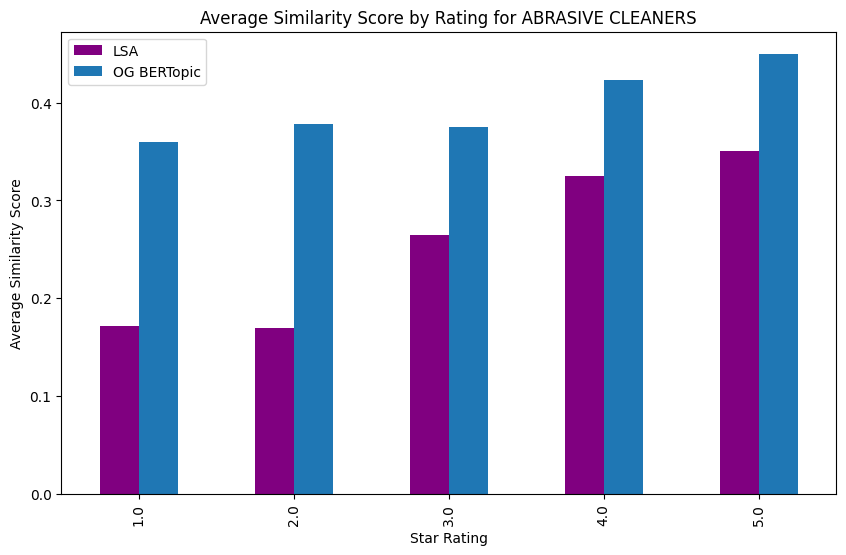

Subcategory: DILUTABLES PINE/DISINFECTING DILUTABLES
LSA: star_rating
1.0    0.332310
2.0    0.282827
3.0    0.364679
4.0    0.447415
5.0    0.419728
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.414110
2.0    0.406646
3.0    0.452740
4.0    0.492476
5.0    0.515646
Name: og_bertopic_similarity_score, dtype: float64



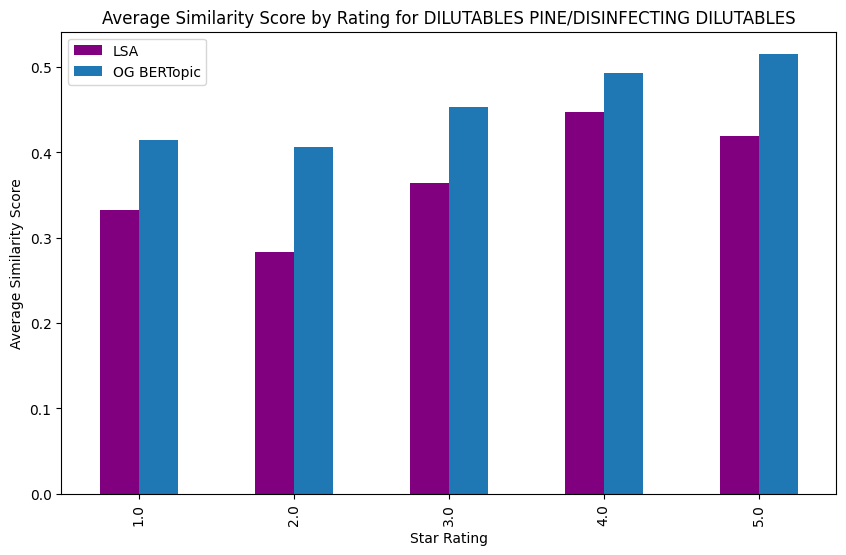

Subcategory: BATHROOM CLEANERS MILDEW CLEANERS
LSA: star_rating
1.0    0.281031
2.0    0.310106
3.0    0.312289
4.0    0.340571
5.0    0.430653
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.442858
2.0    0.466912
3.0    0.461372
4.0    0.465735
5.0    0.495320
Name: og_bertopic_similarity_score, dtype: float64



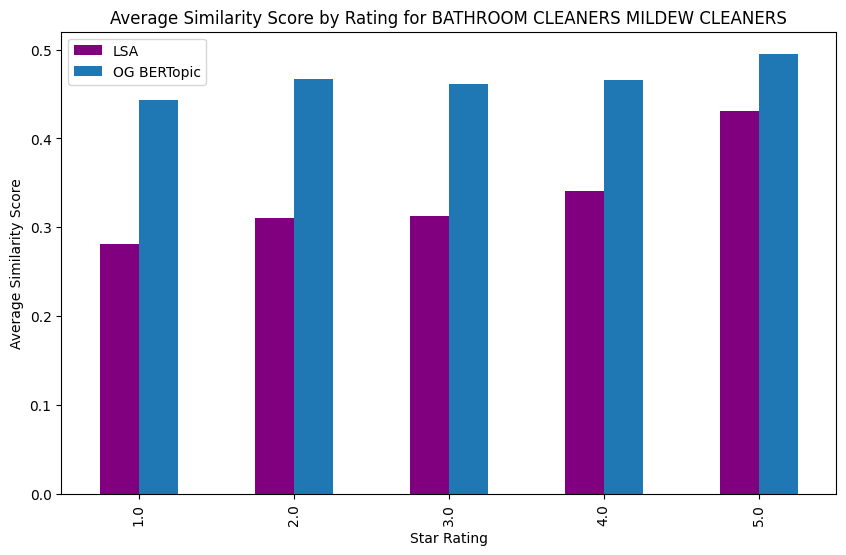

Subcategory: DISH CARE
LSA: star_rating
1.0    0.257305
2.0    0.224571
3.0    0.312874
4.0    0.306346
5.0    0.371462
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.429865
2.0    0.409369
3.0    0.425857
4.0    0.442619
5.0    0.471636
Name: og_bertopic_similarity_score, dtype: float64



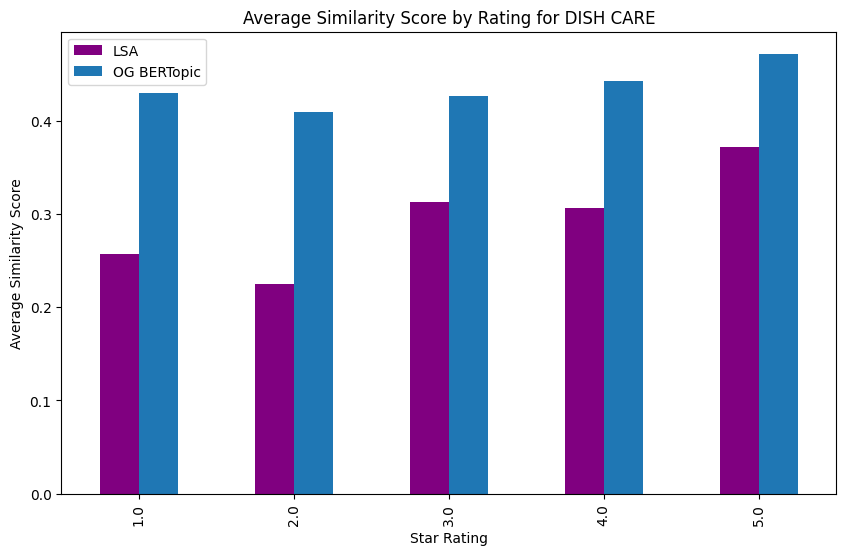

Subcategory: CONSUMABLE TOOLS SPONGES
LSA: star_rating
1.0    0.228145
2.0    0.289539
3.0    0.288618
4.0    0.344503
5.0    0.376081
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.470345
2.0    0.456578
3.0    0.487316
4.0    0.504593
5.0    0.522759
Name: og_bertopic_similarity_score, dtype: float64



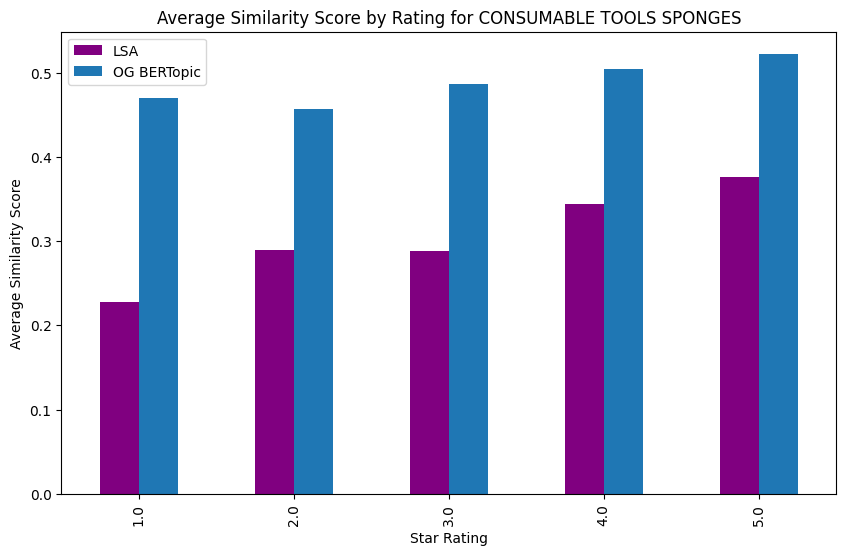

Subcategory: SPECIALIZED SPRAYS
LSA: star_rating
1.0    0.294281
2.0    0.238752
3.0    0.272567
4.0    0.319538
5.0    0.340971
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.488546
2.0    0.493135
3.0    0.476753
4.0    0.520435
5.0    0.541300
Name: og_bertopic_similarity_score, dtype: float64



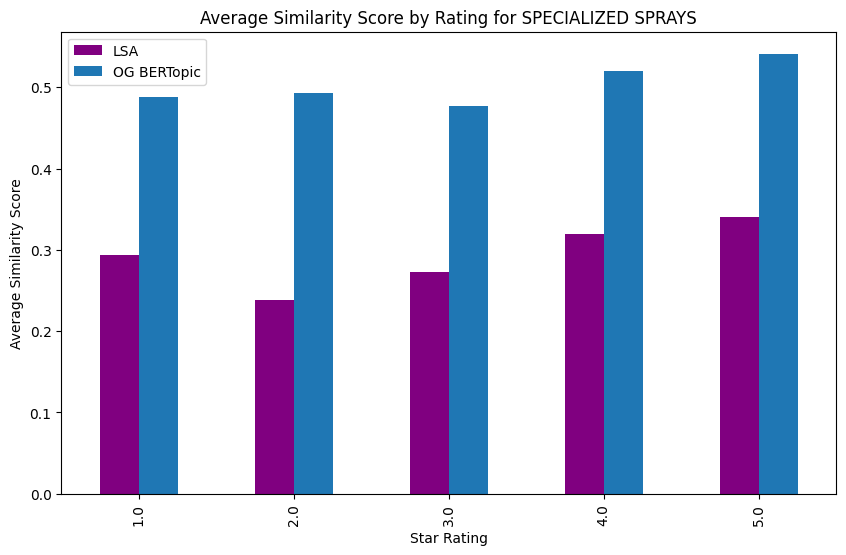

Subcategory: LIP CARE PREMIUM LIP CARE
LSA: star_rating
1.0    0.411882
2.0    0.407679
3.0    0.433754
4.0    0.428503
5.0    0.429627
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.478874
2.0    0.512089
3.0    0.556652
4.0    0.520693
5.0    0.570911
Name: og_bertopic_similarity_score, dtype: float64



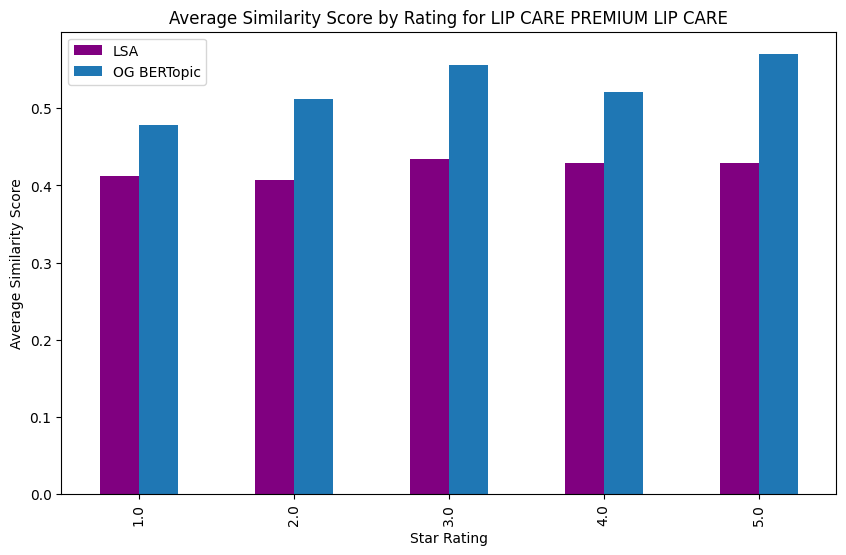

Subcategory: DILUTABLES NATURAL/CONCENTRATED
LSA: star_rating
1.0    0.252467
2.0    0.258778
3.0    0.227168
4.0    0.373260
5.0    0.346683
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.425709
2.0    0.420005
3.0    0.438016
4.0    0.474945
5.0    0.495313
Name: og_bertopic_similarity_score, dtype: float64



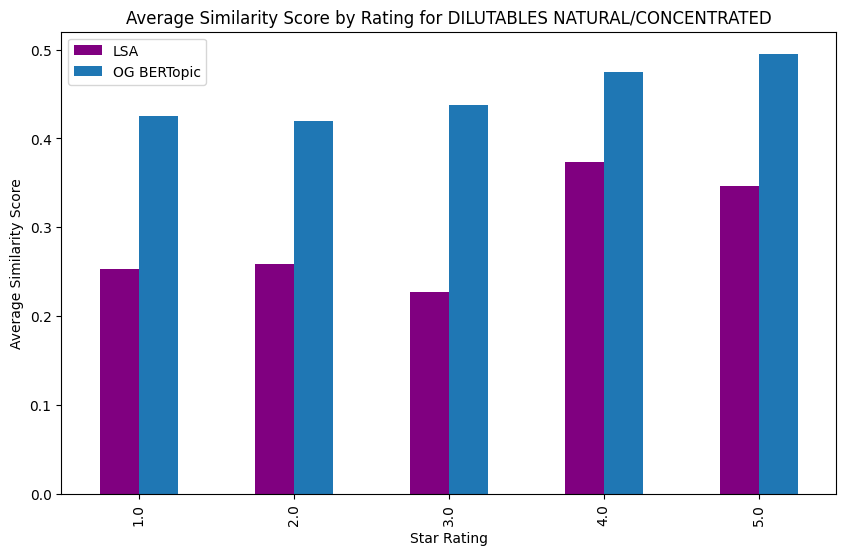

Subcategory: SPECIALIZED SPRAYS OVEN/SPECIALTY
LSA: star_rating
1.0    0.267768
2.0    0.247494
3.0    0.266223
4.0    0.345566
5.0    0.372324
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.423591
2.0    0.453220
3.0    0.509442
4.0    0.479855
5.0    0.499930
Name: og_bertopic_similarity_score, dtype: float64



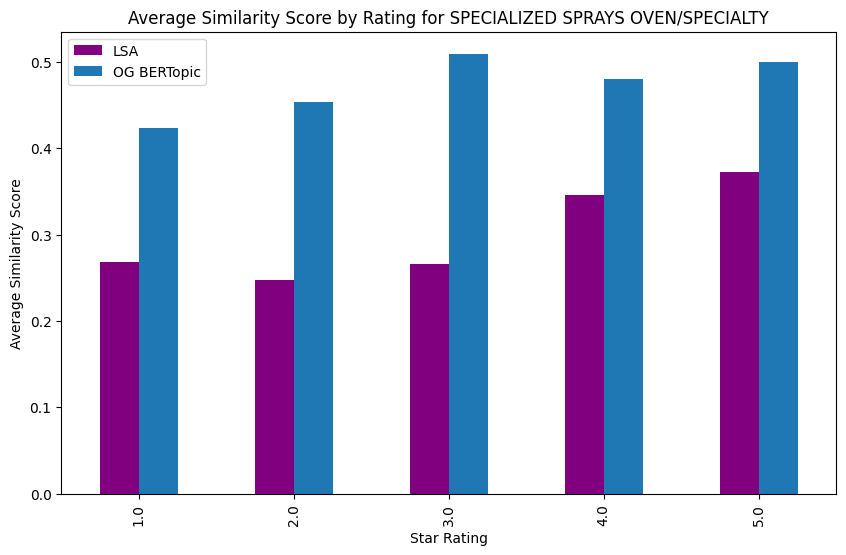

Subcategory: MEN'S CARE
LSA: star_rating
1.0    0.342763
2.0    0.261845
3.0    0.357726
4.0    0.397790
5.0    0.392539
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.445222
2.0    0.457803
3.0    0.497264
4.0    0.516076
5.0    0.523294
Name: og_bertopic_similarity_score, dtype: float64



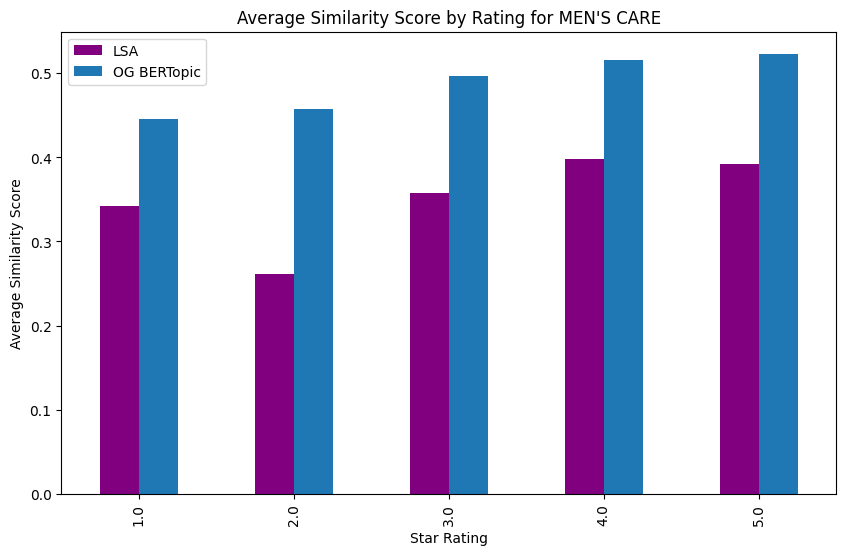

Subcategory: HAIR CARE
LSA: star_rating
1.0    0.370443
2.0    0.413590
3.0    0.310455
4.0    0.426281
5.0    0.444999
Name: lsa_similarity_score, dtype: float64
Original BERTopic: star_rating
1.0    0.411613
2.0    0.450381
3.0    0.424838
4.0    0.427604
5.0    0.464743
Name: og_bertopic_similarity_score, dtype: float64



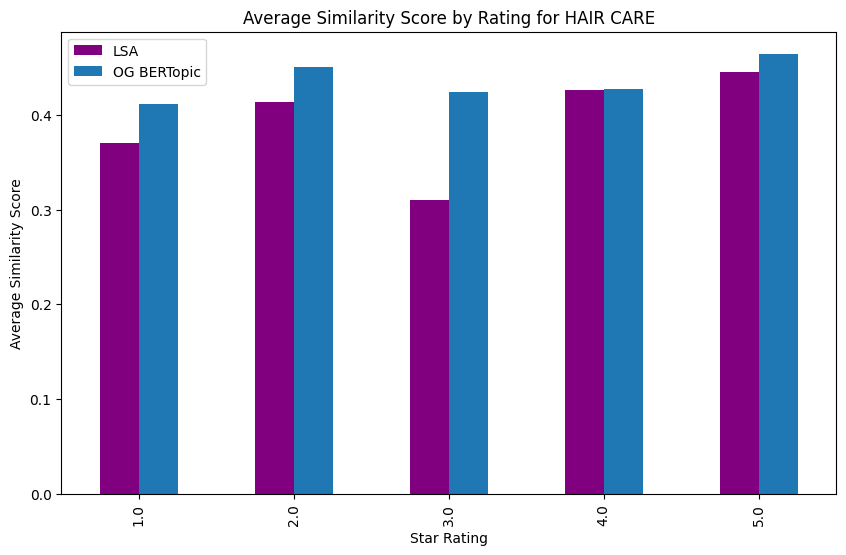

In [ ]:
colors = ['purple', '#1f77b4']
for subcategory in subcategories:
    subcat_filter = lsa_df['subcategory'] == subcategory
    subcat_df = lsa_df[subcat_filter]
    lsa_avg = subcat_df.groupby('star_rating')['lsa_similarity_score'].mean()
    og_bertopic_avg = subcat_df.loc[~subcat_df['og_bertopic_topic'].str.contains('undetermined')].groupby('star_rating')['og_bertopic_similarity_score'].mean()
    print(f"Subcategory: {subcategory}")
    print(f"LSA: {lsa_avg}")
    print(f"Original BERTopic: {og_bertopic_avg}")
    print()

    avg_ss_df = pd.DataFrame({
    'lsa_avg_score': lsa_avg,
    'og_bertopic_avg_score': og_bertopic_avg
    })

    avg_ss_df.plot(kind='bar', figsize=(10, 6), color=colors)
    plt.title(f'Average Similarity Score by Rating for {subcategory}')
    plt.xlabel('Star Rating')
    plt.ylabel('Average Similarity Score')
    plt.legend(['LSA', 'OG BERTopic'])
    plt.show()

# 3 small subcategories

In [ ]:
subcategories = ['FLOOR CLEANERS', 'TOILET BOWL CLEANERS', 'SPRAY CLEANERS BLEACH CLEANERS']
lsa_df = lsa.train_model(subcategories, verbose=1)

Creating LSA model for 1.0 star rating with 160 reviews, 2 topics
Finished creating LSA model for 1.0 star rating in 0.60 seconds

--------------------------------------------------
Creating LSA model for 2.0 star rating with 44 reviews, 2 topics
Finished creating LSA model for 2.0 star rating in 0.56 seconds

--------------------------------------------------
Creating LSA model for 3.0 star rating with 63 reviews, 2 topics
Finished creating LSA model for 3.0 star rating in 0.37 seconds

--------------------------------------------------
Creating LSA model for 4.0 star rating with 95 reviews, 2 topics
Finished creating LSA model for 4.0 star rating in 0.49 seconds

--------------------------------------------------
Creating LSA model for 5.0 star rating with 650 reviews, 1 topics
Finished creating LSA model for 5.0 star rating in 0.25 seconds

--------------------------------------------------
Finished creating LSA models for FLOOR CLEANERS in 2.35 seconds
-----------------------------

/Users/jessicaluo/Desktop/scrap/text_processes/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Time to process chunk 0-1000: 5.50 seconds
Time to process chunk 1000-2000: 0.32 seconds
Total processing time: 5.82 seconds
Creating LSA model for 1.0 star rating with 102 reviews, 2 topics
Finished creating LSA model for 1.0 star rating in 0.39 seconds

--------------------------------------------------
Creating LSA model for 2.0 star rating with 38 reviews, 2 topics
Finished creating LSA model for 2.0 star rating in 0.45 seconds

--------------------------------------------------
Creating LSA model for 3.0 star rating with 57 reviews, 2 topics
Finished creating LSA model for 3.0 star rating in 0.42 seconds

--------------------------------------------------
Creating LSA model for 4.0 star rating with 101 reviews, 1 topics
Finished creating LSA model for 4.0 star rating in 0.22 seconds

--------------------------------------------------
Creating LSA model for 5.0 star rating with 504 reviews, 1 topics
Finished creating LSA model for 5.0 star rating in 0.19 seconds

------------------

/Users/jessicaluo/Desktop/scrap/text_processes/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Time to process chunk 0-1000: 2.71 seconds
Total processing time: 2.71 seconds
Creating LSA model for 1.0 star rating with 272 reviews, 2 topics
Finished creating LSA model for 1.0 star rating in 0.62 seconds

--------------------------------------------------
Creating LSA model for 2.0 star rating with 97 reviews, 2 topics
Finished creating LSA model for 2.0 star rating in 0.57 seconds

--------------------------------------------------
Creating LSA model for 3.0 star rating with 165 reviews, 2 topics
Finished creating LSA model for 3.0 star rating in 0.50 seconds

--------------------------------------------------
Creating LSA model for 4.0 star rating with 420 reviews, 2 topics
Finished creating LSA model for 4.0 star rating in 0.46 seconds

--------------------------------------------------
Creating LSA model for 5.0 star rating with 3777 reviews, 1 topics
Finished creating LSA model for 5.0 star rating in 0.46 seconds

--------------------------------------------------
Finished cr

/Users/jessicaluo/Desktop/scrap/text_processes/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Time to process chunk 0-1000: 4.03 seconds
Time to process chunk 1000-2000: 3.70 seconds
Time to process chunk 2000-3000: 3.80 seconds
Time to process chunk 3000-4000: 3.65 seconds
Time to process chunk 4000-5000: 3.12 seconds
Total processing time: 18.29 seconds


In [ ]:
lsa_df[lsa_df['subcategory'].isin(subcategories)].sample(5)

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type,lsa_topic_number,lsa_top_15_words,lsa_topic_label,lsa_similarity_score
60097,Clorox,Clorox® Clean-Up® All Purpose Cleaner with Ble...,2024-02-12,Office Depot,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,i dont love harsh chemical but there be time a...,5.0,Review and recommendation for Clorox cleaning ...,Clorox,0.0,"like, spray, kitchen, good, cleaner, work, ble...","""Effective cleaners for kitchen and bathroom w...",0.535720
196228,Clorox,Clorox Clean-Up All Purpose Cleaner with Bleac...,2022-11-28,Dollar General,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,this clorox clean work great i use it to clean...,5.0,Review and recommendation for Clorox cleaning ...,Clorox,0.0,"like, spray, kitchen, good, cleaner, work, ble...","""Effective cleaners for kitchen and bathroom w...",0.593171
132072,Scrubbing Bubbles,Scrubbing Bubbles Continuous Clean Drop-Ins - ...,2023-08-28,Walmart,CLEANING,TOILET BOWL CLEANERS,i follow the instruction and i have to clean t...,1.0,Negative experience with toilet cleaning products,Competitor,0.0,"money, dont, toilet clean, bowl, thats, blue t...","""Disappointing toilet doesn't clean properly""",0.517743
68168,Clorox,Clorox Clean-Up All Purpose Cleaner with Bleac...,2024-01-22,Walmart,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,this clean altho it have bleach doesnt smell o...,5.0,Disinfectant spray recommendations and reviews...,Clorox,0.0,"like, spray, kitchen, good, cleaner, work, ble...","""Effective cleaners for kitchen and bathroom w...",0.612345
194889,Clorox,Clorox Clean-Up All Purpose Cleaner with Bleac...,2022-12-12,Amazon,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,these item be break in portland pack in there ...,2.0,Leaking and damaged products upon arrival,Clorox,0.0,"like, buy bottle, use, clean, sprayer, bleach,...","""Product leaks issues with boxes and bottles""",0.534986


In [ ]:
pd.set_option('display.max_colwidth', None)
print('Topic information for', subcategories[0])
lsa.get_topic_information(subcategories[0])

Topic information for FLOOR CLEANERS


,star_rating,lsa_topic_label,lsa_similarity_score,count
0,1.0,"""Don't waste money on ineffective cleaning products""",0.294661,16
1,1.0,"""Waste money on a bad mop that doesn't work""",0.290455,144
2,2.0,"""Doesn't clean effectively or work as expected""",0.291556,39
3,2.0,"""Product information lacks clarity on faulty car seat functioning and pet stain issues""",0.266910,5
4,3.0,"""Good smell and clean carpet, decent results""",0.336057,45
5,3.0,"""Snap product often breaks, good in office use.""",0.210181,18
6,4.0,"""Easy good clean job with great results and pleasant smell""",0.291992,83
7,4.0,"""Mopping with Oceadr mop head is easy and love using it""",0.476742,12
8,5.0,"""Easy-to-use, great working carpet cleaner with no stain or smell issues""",0.391185,650


In [ ]:
# calculate similarity score btwn reviews and top 15 words
subset = lsa_df[lsa_df['subcategory'].isin(subcategories)]
word_similarity_scores = similarity_scores(list(subset['review_text']), list(subset['lsa_top_15_words']))

/Users/jessicaluo/Desktop/scrap/text_processes/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Time to process chunk 0-1000: 4.53 seconds
Time to process chunk 1000-2000: 4.17 seconds
Time to process chunk 2000-3000: 4.22 seconds
Time to process chunk 3000-4000: 4.09 seconds
Time to process chunk 4000-5000: 3.90 seconds
Time to process chunk 5000-6000: 4.76 seconds
Time to process chunk 6000-7000: 2.86 seconds
Total processing time: 28.53 seconds


In [22]:
lsa_df.loc[subset.index, 'top_words_similarity_scores'] = word_similarity_scores

In [ ]:
subset = lsa_df[lsa_df['subcategory'].isin(subcategories)]
lsa_df[lsa_df['subcategory'].isin(subcategories)].sample(2)

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type,lsa_topic_number,lsa_top_15_words,lsa_topic_label,lsa_similarity_score,top_words_similarity_scores
191592,Clorox,"Clorox Clean-Up All Purpose Cleaner with Bleach, Spray Bottle, Fresh Scent, 32 Ounces",2023-01-09,Target,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,it be tap all over to prevent leak but it be leak all over though it do the job i be disappoint that the bleach be all over the place,3.0,Leaking and damaged products upon arrival,Clorox,0.0,"great, clorox, box, sprayer, good, like, work, smell, bleach, use, leak, clean, spray, product, bottle","A reliable Clorox bleach box with a great spray bottle, good for cleaning and use.",0.317915,0.149802
40258,Clorox,"Clorox Clean-Up All Purpose Cleaner with Bleach, Spray Bottle, Original, 32 Ounces",2024-03-25,Walmart,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,it have take every stain out of the counter top,5.0,Stain removal products and techniques,Clorox,0.0,"like, spray, kitchen, good, cleaner, work, bleach, clorox, smell, bathroom, great, love, product, use, clean","""Effective cleaners for kitchen and bathroom with great smell and ease of use""",0.285538,0.239423


In [ ]:
# for each subcategory, compare the word_similarity_scores with the similarity scores from LSA
for subcat in subcategories:
    subcat_filter = subset['subcategory'] == subcat
    subcat_df = subset[subcat_filter]
    lsa_similarity_scores = subcat_df['lsa_similarity_score'].values
    word_similarity_scores_subcat = subcat_df['top_words_similarity_scores'].values
    similarity_diff = lsa_similarity_scores - word_similarity_scores_subcat
    subset.loc[subcat_filter, 'topic_phrase_SS - topic_words_SS'] = similarity_diff
    print(f"topic_phrase_SS - topic_words_SS for subcategory: {subcat}")
    print(pd.DataFrame(similarity_diff).describe())

topic_phrase_SS - topic_words_SS for subcategory: FLOOR CLEANERS
                 0
count  1012.000000
mean      0.053116
std       0.100971
min      -0.266543
25%      -0.015518
50%       0.055064
75%       0.123545
max       0.285169
topic_phrase_SS - topic_words_SS for subcategory: TOILET BOWL CLEANERS
                0
count  802.000000
mean     0.031563
std      0.106760
min     -0.278897
25%     -0.049200
50%      0.042281
75%      0.107484
max      0.292874
topic_phrase_SS - topic_words_SS for subcategory: SPRAY CLEANERS BLEACH CLEANERS
                 0
count  4731.000000
mean      0.027781
std       0.093199
min      -0.330104
25%      -0.034923
50%       0.030206
75%       0.092309
max       0.347309


/var/folders/x2/lsyflj4j07jc1sb3w3hfgmjc0000gn/T/ipykernel_33477/2037968194.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[subcat_filter, 'topic_phrase_SS - topic_words_SS'] = similarity_diff


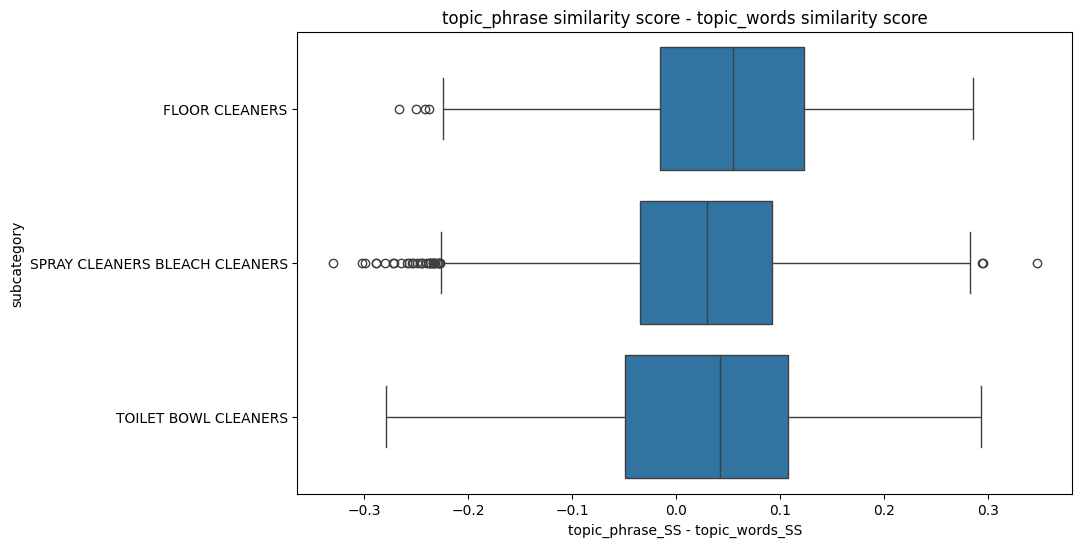

In [42]:
# plot boxplot of similarity score differences for each subcategory
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

sns.boxplot(y='subcategory', x='topic_phrase_SS - topic_words_SS', data=subset, vert=False)
plt.title('topic_phrase similarity score - topic_words similarity score')
plt.show()